# **Course Lab**    

**Course No.:** MPBA G513    
**Course Title:** Predictive Analytics 

**Lab Marks : 3** 

# Introduction

Today we will cover Clustering and Topic Modelling.



## About the algorithms

**Clustering** is a machine learning algorithm used to group similar data points together into clusters. It works by analyzing a set of data and identifying patterns or similarities between the data points.

The algorithm then groups the similar data points into clusters based on their similarities, while also ensuring that data points in different clusters are as dissimilar as possible.

Clustering is often used in data analysis to discover relationships between data points and to identify patterns that can help inform decision-making.


**Topic modelling** is a machine learning technique used to extract topics from a large set of unstructured text data, such as articles or documents. The algorithm works by analyzing the text and identifying common themes or topics that appear throughout the dataset.

The algorithm assigns probabilities to each word in the dataset and groups the words together into topics based on their probability distributions. The resulting topics can then be used to identify important themes or trends in the data, allowing for better understanding and analysis of the text.

Topic modelling can be useful in a variety of applications, such as content analysis, recommendation systems, and sentiment analysis.

## How it works under the hood?

**Clustering** 

A commomn clustering technique is k-means. 

The k-means algorithm works by first randomly selecting a set of "centroid" points, which will serve as the initial centers of the clusters. The algorithm then assigns each data point to the nearest centroid, based on their distances from each centroid.

Once all the data points have been assigned to a centroid, the algorithm recalculates the center of each cluster by taking the mean of all the data points assigned to that cluster. This new center becomes the new centroid of that cluster.

The algorithm then repeats this process of assigning data points to their nearest centroid and recalculating the center of each cluster until the centroids no longer change or a maximum number of iterations is reached.

** Topic Modelling**

Topic modelling is a probabilistic technique used to uncover the underlying topics in a large set of unstructured text data, such as articles or documents. The most common technique used for topic modelling is Latent Dirichlet Allocation (LDA).

LDA assumes that each document is a mixture of a small number of topics, and that each topic is a distribution of words. The algorithm works by attempting to reverse-engineer this process, given a collection of documents, to determine the topics and their word distributions.

Under the hood, LDA works by iteratively assigning each word in each document to a topic, and then updating the probabilities of each word in each topic based on the assignments. The algorithm attempts to find the best set of topics and word distributions that can explain the observed data.

## About the dataset

Today's dataset is a collection of tweets from the csutomers of a Telecom company. 

The dataset has ~ 21k tweets. 


# Guided Practice 

## Import libraries and read the dataset

In [ ]:
import nltk
import numpy as np
import re # remove regex
import pandas as pd 

%matplotlib inline



In [ ]:
## Get multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [ ]:
## Display all rows and columns of a dataframe instead of a truncated version
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
raw_data  = pd.read_csv("https://bubeebkt.s3.amazonaws.com/ds-datasets/tweets.csv",encoding = 'ISO-8859-1')
print(len(raw_data))

21047


In [ ]:
df = raw_data
df.head()

## EDA

In [ ]:
unique_text = df.tweet.unique()
print(len(unique_text))

21047


In [ ]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt


### Clean up the tweets 

In [ ]:
df['Clean_text'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")


In [ ]:
df['Clean_text'] = df['Clean_text'].str.replace("[^a-zA-Z#]", " ")

In [ ]:
df["Clean_text"]= df["Clean_text"].str.lower() 
df['Clean_text'][0]

In [ ]:
#Remove words with length of 2 or less
df['Clean_text'] = df['Clean_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))
df.head()

In [ ]:
tokenized_tweet = df['Clean_text'].apply(lambda x: x.split())
tokenized_tweet.head()

In [ ]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

df['Clean_text'] = tokenized_tweet

In [ ]:
df['Clean_text'].head()

0    please check what happens this not woking sinc...
1    network fluctuations and speed pathetic need j...
2    this has been going since this absolutely unpr...
3    have done recharge but haven got perday with u...
4    but when still not received any call from cust...
Name: Clean_text, dtype: object

In [ ]:
df.drop_duplicates(subset=['Clean_text'], keep = 'first',inplace= True)
df.shape[0]

19762

In [ ]:
df.reset_index(drop=True,inplace=True)

In [ ]:
df['Clean_text_length'] = df['Clean_text'].apply(len)
df.head()

,username,date,tweet,mentions,Clean_text,Clean_text_length
0,shivaji_takey,10-06-2020,Please check what happens to this no 940417705...,['vodafonein'],please check what happens this not woking sinc...,68
1,sarasberiwala,10-06-2020,Network fluctuations and 4G Speed is pathetic....,['vodafonein'],network fluctuations and speed pathetic need j...,78
2,chitreamod,10-06-2020,This has been going on since 3rd... this absol...,['vodafonein'],this has been going since this absolutely unpr...,56
3,sanjan_suman,10-06-2020,@VodafoneIN I have done my recharge of 555 on...,['vodafonein'],have done recharge but haven got perday with u...,178
4,t_nihsit,10-06-2020,But when???Still I am not received any call fr...,['vodafonein'],but when still not received any call from cust...,74


In [ ]:
df[df['Clean_text_length']==0]

,username,date,tweet,mentions,Clean_text,Clean_text_length
20,omanmessi,10-06-2020,@VodafoneIN,"['ooredoooman', 'vodafonein']",,0


In [ ]:
raw_data[raw_data['username']=='omanmessi']

,username,date,tweet,mentions,Clean_text,Clean_text_length
20,omanmessi,10-06-2020,@VodafoneIN,"['ooredoooman', 'vodafonein']",,0


In [ ]:
df[df['Clean_text_length']==0]['Clean_text'] ## Looks like these are tweets with different languages or just hastags.
# We can simply drop these tweets
indexes = df[df['Clean_text_length']==0]['Clean_text'].index
indexes

20    
Name: Clean_text, dtype: object

Int64Index([20], dtype='int64')

In [ ]:
df.drop(index = indexes,inplace=True)

In [ ]:
df.reset_index(drop=True,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19761 entries, 0 to 19760
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   username           19761 non-null  object
 1   date               19761 non-null  object
 2   tweet              19761 non-null  object
 3   mentions           19761 non-null  object
 4   Clean_text         19761 non-null  object
 5   Clean_text_length  19761 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 926.4+ KB


In [ ]:
df['Clean_text'].head()

0    please check what happens this not woking sinc...
1    network fluctuations and speed pathetic need j...
2    this has been going since this absolutely unpr...
3    have done recharge but haven got perday with u...
4    but when still not received any call from cust...
Name: Clean_text, dtype: object

In [ ]:
df['Clean_text'].shape

(19761,)

### Converting Text into features: The Vectorizer

**Text vectorization** is the process of converting a piece of text into a numerical representation that can be used by machine learning algorithms. 

The most common way to vectorize text is to use a technique called "bag-of-words" representation. This involves breaking up a piece of text into individual words (or tokens) and creating a matrix where each row represents a different document or text sample, and each column represents a unique word from the vocabulary. The values in the matrix indicate how many times each word appears in each document. For example, if the word "cat" appears twice in a document, the corresponding entry in the matrix would be 2.

### TfidfVectorizer:

TF-IDF (Term Frequency-Inverse Document Frequency) vectorizer is a popular technique used in natural language processing to vectorize text documents. It is an extension of the "bag-of-words" representation that takes into account the importance of individual words in a document and across the entire corpus (collection of documents).

TF-IDF vectorization involves two main steps:

**Term Frequency (TF)**: This step involves computing the frequency of each word (term) in a document. The frequency is calculated by dividing the number of times a word appears in the document by the total number of words in the document. The idea behind this step is that words that appear frequently in a document are likely to be important for understanding the meaning of the document.

**Inverse Document Frequency (IDF)**: This step involves calculating the importance of each word in the entire corpus of documents. The importance is calculated by taking the logarithm of the total number of documents in the corpus divided by the number of documents that contain the word. The idea behind this step is that words that appear in a small number of documents are likely to be more important for understanding the meaning of the corpus.

The TF and IDF values are then multiplied to obtain the final TF-IDF score for each word in each document. The TF-IDF score measures how important a word is in a document and across the entire corpus. Words that have high TF-IDF scores are considered to be more important for understanding the meaning of a document or corpus.

The TF-IDF vectorizer generates a matrix where each row represents a different document, and each column represents a unique word from the vocabulary. The values in the matrix represent the TF-IDF scores for each word in each document. This matrix can then be used as input to machine learning algorithms for tasks such as text classification, information retrieval, and content recommendation.


CountVectorizer:

Convert a collection of text documents to a matrix of token counts
The CountVectorizer provides a simple way to both tokenize a collection of text documents and build a vocabulary of known words, but also to encode new documents using that vocabulary\
Number of features will be equal to the vocabulary size found by analyzing the data.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(analyzer='word',ngram_range=(1,1), stop_words='english', min_df = 0.0001, max_df=0.7)
count_vect.fit(df['Clean_text'])
desc_matrix = count_vect.transform(df["Clean_text"])
desc_matrix

CountVectorizer(max_df=0.7, min_df=0.0001, stop_words='english')

<19761x6743 sparse matrix of type '<class 'numpy.int64'>'
	with 198134 stored elements in Compressed Sparse Row format>

In [ ]:
desc_matrix.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
desc_matrix.shape

(19761, 6743)

## Clustering

In [ ]:
!pip3 install KMeans
!pip3 install wordcloud

In [ ]:
from sklearn.cluster import KMeans
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests
import matplotlib.pyplot as plt

In [ ]:
num_clusters = 2
km = KMeans(n_clusters=num_clusters)
km.fit(desc_matrix)
clusters = km.labels_.tolist()

KMeans(n_clusters=2)

In [ ]:
tweets = {'Tweet': df["Clean_text"].tolist(), 'Cluster': clusters}
frame = pd.DataFrame(tweets, index = [clusters])
frame.head()

In [ ]:
frame['Cluster'].value_counts()

1    15991
0     3770
Name: Cluster, dtype: int64

In [ ]:
cluster_0=frame[frame['Cluster'] == 0]
cluster_0.head()

,Tweet,Cluster
0,why the hell previous plan deactivated and why...,0
0,double data speed #same you vodafone pic twitt...,0
0,have already used the link and done pia please...,0
0,super fast network thank you pic twitter com k...,0
0,you can provide the speed sufficient network p...,0


In [ ]:
def wordcloud(cluster):
  # combining the image with the dataset
  Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

  # We use the ImageColorGenerator library from Wordcloud 
  # Here we take the color of the image and impose it over our wordcloud
  image_colors = ImageColorGenerator(Mask)

  # Now we use the WordCloud function from the wordcloud library 
  wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(cluster)

  # Size of the image generated 
  plt.figure(figsize=(10,20))

  # Here we recolor the words from the dataset to the image's color
  # recolor just recolors the default colors to the image's blue color
  # interpolation is used to smooth the image generated 
  plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")

  plt.axis('off')
  plt.show()

In [ ]:
cluster_0_words = ' '.join(text for text in cluster_0['Tweet'])

In [ ]:
cluster_0_words

Cluster 0: Tells about the problems related to services - !! Different clusers are formed each time!!

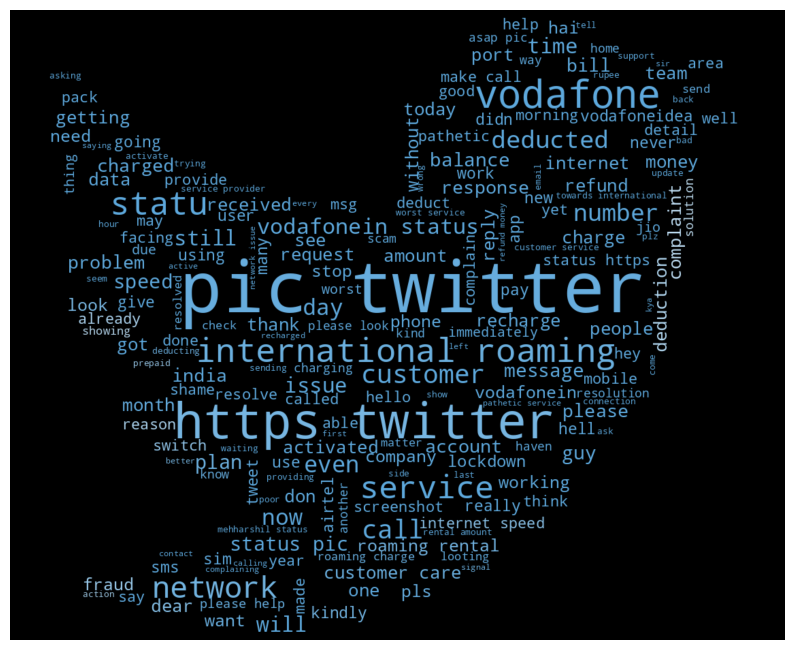

In [ ]:
wordcloud(cluster_0_words)

In [ ]:
cluster_1=frame[frame['Cluster'] == 1]

In [ ]:
cluster_1_words = ' '.join(text for text in cluster_1['Tweet'])


cluster 1: tells about the problems about rental amount

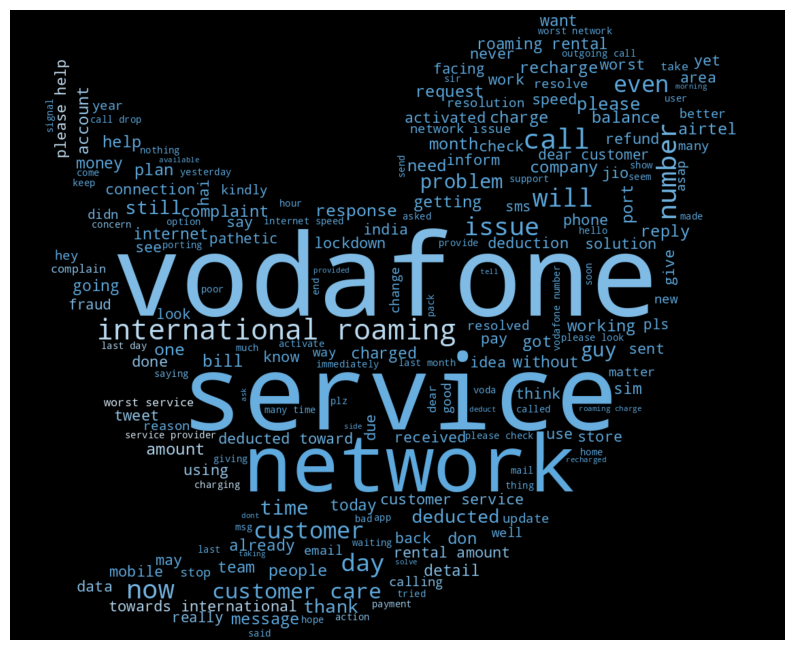

In [ ]:
wordcloud(cluster_1_words)

The topics in one of the clusters is all over the place. Let us create a more detailed clusters

In [ ]:
num_clusters = 8
km = KMeans(n_clusters=num_clusters)
km.fit(desc_matrix)
clusters = km.labels_.tolist()
# from sklearn.neighbors import KNeighborsClassifier
# knn = KNeighborsClassifier(n_neighbors=8)
# knn.fit(desc_matrix)
# clusters = km.labels_.tolist()


KMeans()

TypeError: ignored

In [ ]:
tweets = {'Tweet': df["Clean_text"].tolist(), 'Cluster': clusters}
frame = pd.DataFrame(tweets, index = [clusters])
frame.head()

In [ ]:
frame['Cluster'].value_counts()

In [ ]:
cluster_0=frame[frame['Cluster'] == 0]

In [ ]:
cluster_0=frame[frame['Cluster'] == 0]
cluster_0_words = ' '.join(text for text in cluster_0['Tweet'])
wordcloud(cluster_0_words)

In [ ]:
cluster_1=frame[frame['Cluster'] == 1]
cluster_1_words = ' '.join(text for text in cluster_1['Tweet'])
wordcloud(cluster_1_words)

In [ ]:
cluster_2=frame[frame['Cluster'] == 2]
cluster_2_words = ' '.join(text for text in cluster_2['Tweet'])
wordcloud(cluster_2_words)

In [ ]:
cluster_3=frame[frame['Cluster'] == 3]
cluster_3_words = ' '.join(text for text in cluster_3['Tweet'])
wordcloud(cluster_3_words)

In [ ]:
cluster_4=frame[frame['Cluster'] == 4]
cluster_4_words = ' '.join(text for text in cluster_4['Tweet'])
wordcloud(cluster_4_words)

In [ ]:
cluster_5=frame[frame['Cluster'] == 5]
cluster_5_words = ' '.join(text for text in cluster_5['Tweet'])
wordcloud(cluster_5_words)

In [ ]:
cluster_6=frame[frame['Cluster'] == 6]
cluster_6_words = ' '.join(text for text in cluster_6['Tweet'])
wordcloud(cluster_6_words)

In [ ]:
cluster_7=frame[frame['Cluster'] == 7]
cluster_7_words = ' '.join(text for text in cluster_7['Tweet'])
wordcloud(cluster_7_words)

## Topic Modelling 

In [ ]:
def identify_topics(df, desc_matrix, num_clusters):
    km = KMeans(n_clusters=num_clusters)
    km.fit(desc_matrix)
    clusters = km.labels_.tolist()
    tweets = {'Tweet': df["Clean_text"].tolist(), 'Cluster': clusters}
    frame = pd.DataFrame(tweets, index = [clusters])
    print(frame['Cluster'].value_counts())

    
    for cluster in range(num_clusters):
        cluster_words = ' '.join(text for text in frame[frame['Cluster'] == cluster]['Tweet'])
        wordcloud(cluster_words)
        


In [ ]:
identify_topics(df, desc_matrix, 4)

In [ ]:
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
import gensim
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

In [ ]:
data = df["Clean_text"].values.tolist()
data_words = list(sent_to_words(data))

In [ ]:
# remove stop words
data_words = remove_stopwords(data_words)


In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

In [ ]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

# Assignment

## Exercise 1 (1 mark)

Use KNN to split the tweets into 8 clusters. 


In [ ]:
#cluster_8=
#cluster_8_words = 
#wordcloud()

## Exercise 2 (1 mark) 
Q: You are the Customer Service Manager at this Telecom company. Explain how you will use this clustering analysis to improve customer service. 

A:   

## Exercise 3 (1 mark) 

Taking the example of the Topic Model (LDA) above, explain qualitatively how you will evaluate the model?

Contrast with the quantative evaluation of the supervised models. 

XXX